In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import statsmodels.api as sm

In [70]:
# Load dataset and show all rows
df = pd.read_csv("credit_risk_dataset.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Examine dataset

In [71]:
# Checking shape of dataset
df.shape

(32581, 12)

In [72]:
# Checking datatypes
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [73]:
# Describing data
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [74]:
# Checking NULL values per column
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [75]:
# Checking NULL values per column in relation to all values of a column
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(df)

,Missing Values,% of Total Values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,2.747000
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,9.563856
loan_status,0,0.000000
loan_percent_income,0,0.000000


In [76]:
# Checking NULL values per row
amount_of_null_values_per_row = df.isnull().sum(axis=1)
pd.Series(amount_of_null_values_per_row).value_counts()

0    28638
1     3875
2       68
dtype: int64

### Examine the variables and remove the outliers

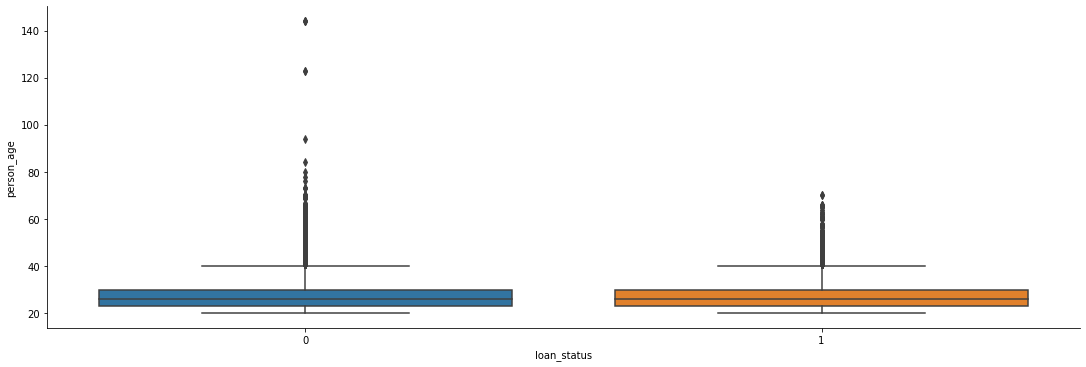

In [77]:
sns.catplot(y="person_age", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [78]:
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


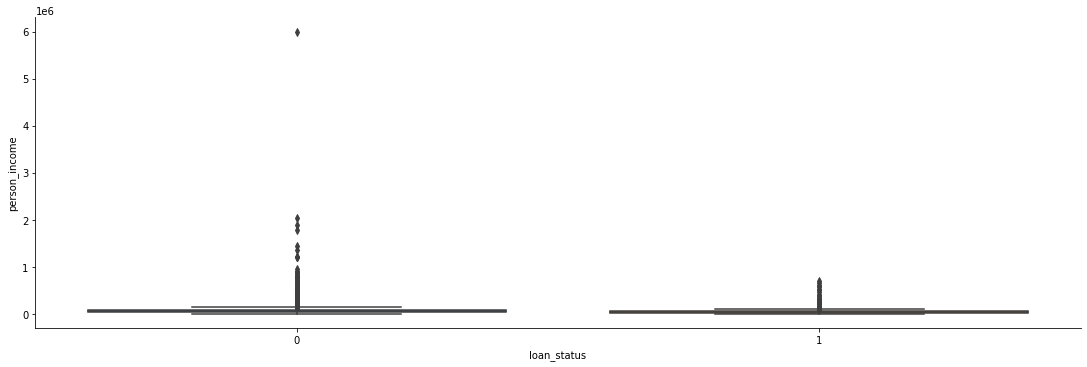

In [79]:
sns.catplot(y="person_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [80]:
df[df['person_income']>5000000]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


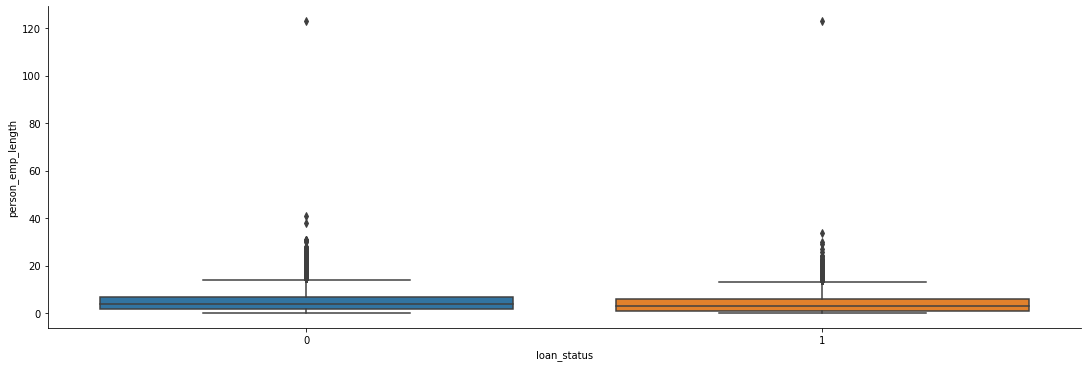

In [81]:
sns.catplot(y="person_emp_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [82]:
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


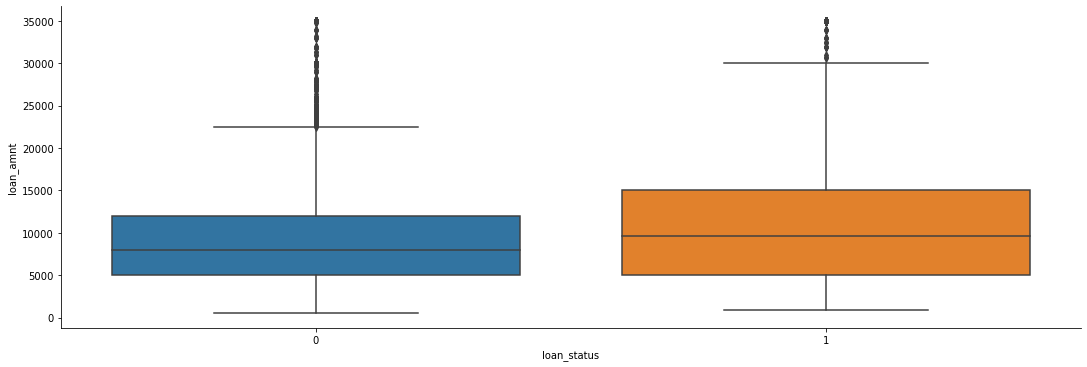

In [83]:
sns.catplot(y="loan_amnt", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

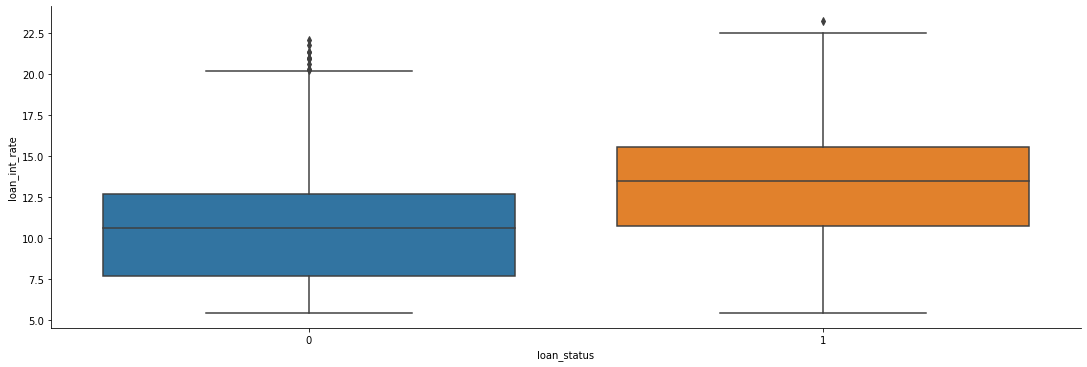

In [84]:
sns.catplot(y="loan_int_rate", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [85]:
df[df['loan_int_rate']>20]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4
448,26,103872,RENT,6.0,DEBTCONSOLIDATION,G,24000,20.03,1,0.23,N,4
451,26,108000,RENT,9.0,EDUCATION,G,24000,20.16,1,0.22,N,3
457,23,114750,RENT,2.0,MEDICAL,G,24000,20.03,1,0.18,Y,3
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.21,1,0.39,Y,4
1189,24,54000,RENT,0.0,PERSONAL,G,16750,20.11,1,0.31,Y,2
1827,24,30000,RENT,5.0,MEDICAL,G,2000,21.27,1,0.07,Y,3
2436,22,23000,RENT,1.0,MEDICAL,F,2800,21.74,1,0.12,N,4
2620,22,37000,RENT,2.0,DEBTCONSOLIDATION,E,3000,20.30,1,0.08,N,2
2897,22,35000,MORTGAGE,NaN,VENTURE,F,5000,21.36,0,0.14,Y,2


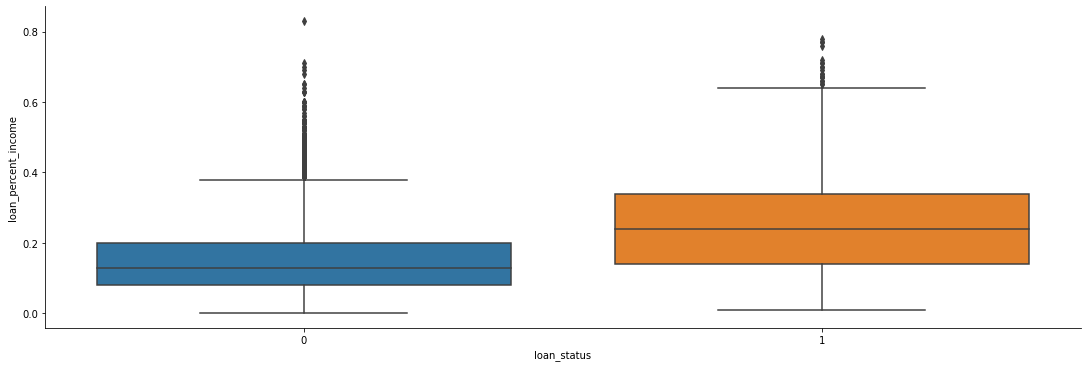

In [86]:
sns.catplot(y="loan_percent_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [87]:
df[df['loan_percent_income']>0.7]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
460,24,18000,OWN,6.0,PERSONAL,A,13000,7.88,1,0.72,N,3
571,21,19500,MORTGAGE,0.0,EDUCATION,B,15000,9.64,1,0.77,N,2
577,26,26000,RENT,10.0,EDUCATION,B,20050,9.76,1,0.77,N,2
640,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,0,0.83,N,3
2452,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4
10007,21,13000,RENT,0.0,DEBTCONSOLIDATION,C,9250,12.53,1,0.71,N,3
18203,30,32004,RENT,1.0,PERSONAL,B,24250,11.12,1,0.76,N,5
23727,32,12000,RENT,1.0,MEDICAL,A,9325,8.38,1,0.78,N,6
27878,33,10080,OWN,11.0,VENTURE,A,7200,6.03,1,0.71,N,8


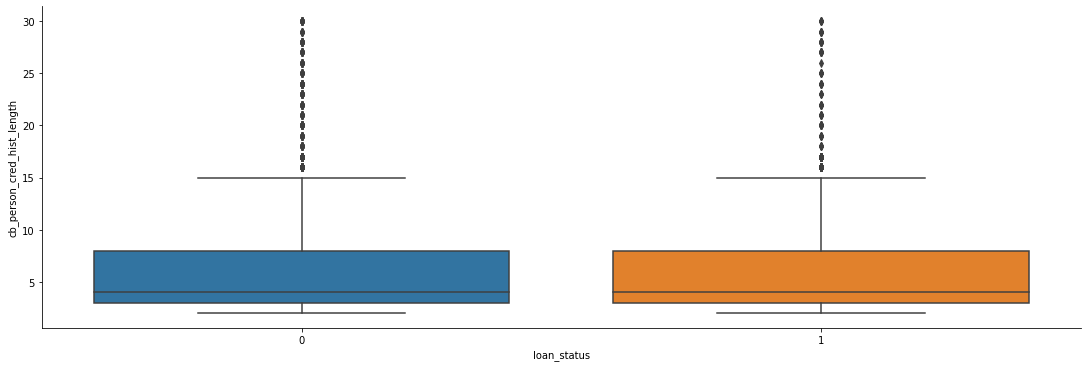

In [88]:
sns.catplot(y="cb_person_cred_hist_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [89]:
# Deciding on which datasets to remove based on boxplots and checked values in table:

# removing outliers for person_age > 100
# removing outliers for person_emp_length > 50
# removing outliers for person_income > 600k

In [90]:
# Removing data:
df_clean = df[(df['person_age']<=100)&(df['person_emp_length']<=50)&(df['person_income']<=5000000)]
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


### Visualise relations between different varibales 

In [91]:
# Sorting dataframe by loan_grade for better visualisation
df_clean = df_clean.sort_values(by="loan_grade")
df_clean.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24285,31,60000,RENT,4.0,HOMEIMPROVEMENT,A,4200,8.49,0,0.07,N,10
9577,21,25200,RENT,1.0,EDUCATION,A,8250,7.49,1,0.33,N,4
9578,23,30000,RENT,5.0,MEDICAL,A,8250,7.51,0,0.28,N,4
22777,34,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,4000,5.42,0,0.07,N,8
9582,23,62500,MORTGAGE,7.0,VENTURE,A,4000,7.43,0,0.06,N,3
22774,28,18000,RENT,9.0,HOMEIMPROVEMENT,A,7600,8.49,1,0.42,N,9
22770,27,85000,RENT,1.0,DEBTCONSOLIDATION,A,7525,NaN,0,0.09,N,8
9590,25,30000,RENT,0.0,HOMEIMPROVEMENT,A,8300,8.90,1,0.28,N,3
22766,31,58000,MORTGAGE,15.0,VENTURE,A,8875,NaN,0,0.15,N,6
9592,21,50000,RENT,5.0,DEBTCONSOLIDATION,A,8300,8.90,0,0.17,N,4


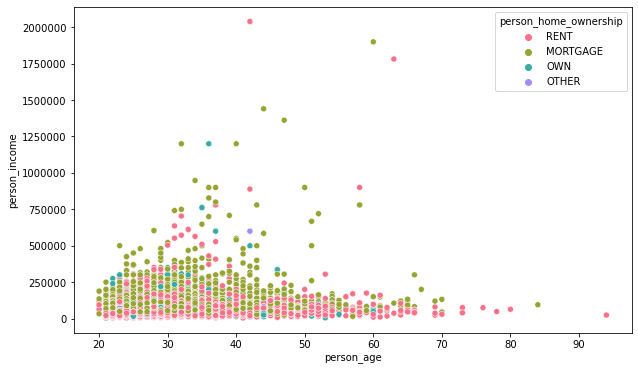

In [92]:
# Plotting person_age vs. person_income, person_home_ownership
fig, ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
sns.scatterplot(x="person_age", y="person_income", data=df_clean, hue="person_home_ownership", palette="husl")
plt.show()

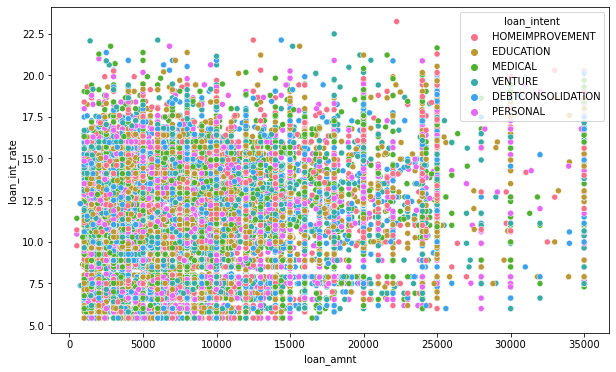

In [93]:
# Plotting loan_amnt vs. loan_int_rate, grouped by loan_intent
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_amnt", y="loan_int_rate", data=df_clean, hue="loan_intent", palette="husl")
plt.show()

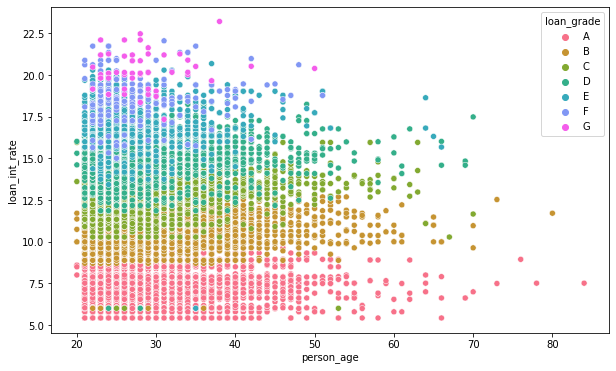

In [94]:
# Plotting person_age vs. loan_int_rate, grouped by loan_grade
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="person_age", y="loan_int_rate", data=df_clean, hue="loan_grade", palette="husl")
plt.show()

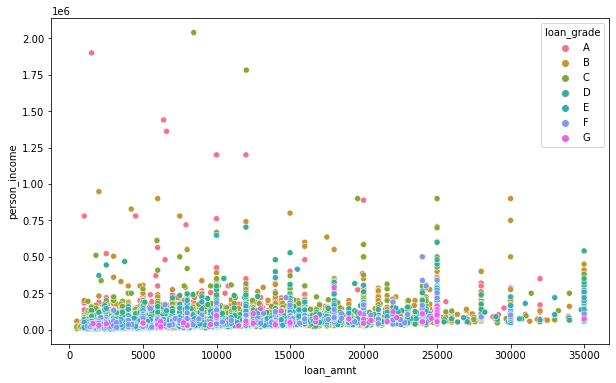

In [95]:
# Plotting l vs. person_income, grouped by loan_grade
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_amnt", y="person_income", data=df_clean, hue="loan_grade", palette="husl")
plt.show()

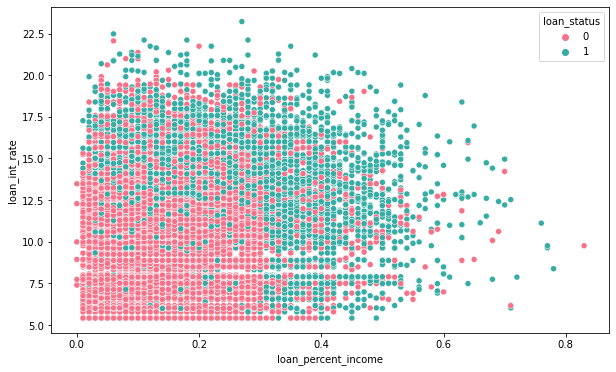

In [96]:
# Plotting loan_percent_income vs. loan_int_rate, grouped by loan_status
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_percent_income", y="loan_int_rate", data=df_clean, hue="loan_status", palette="husl")
plt.show()

In [97]:
# Person_home_ownership
default_hist_status_tab = pd.crosstab(df_clean['person_home_ownership'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
person_home_ownership,,
MORTGAGE,11460,1630
OTHER,74,33
OWN,2243,167
RENT,11077,4995


### Relations between categorical variables and loan_status

In [98]:
# Person_home_ownership
default_hist_status_tab = pd.crosstab(df_clean['person_home_ownership'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
person_home_ownership,,
MORTGAGE,11460,1630
OTHER,74,33
OWN,2243,167
RENT,11077,4995


In [99]:
# number of customers per home ownership
mortgage=default_hist_status_tab.iloc[0].sum()
other=default_hist_status_tab.iloc[1].sum()
own=default_hist_status_tab.iloc[2].sum()
rent=default_hist_status_tab.iloc[3].sum()
# number of customers per home ownership who default
mortgage_default=default_hist_status_tab.iloc[0,1].sum()
other_default=default_hist_status_tab.iloc[1,1].sum()
own_default=default_hist_status_tab.iloc[2,1].sum()
rent_default=default_hist_status_tab.iloc[3,1].sum()
# % number of customers per home ownership who default
mortgage_pers= round(mortgage_default / mortgage * 100, 2)
other_pers= round(other_default / other * 100, 2)
own_pers= round(own_default / own * 100, 2)
rent_pers= round(rent_default / rent * 100, 2)
print("{} % of clients with a mortgage have defaulted.".format(mortgage_pers))
print("{} % of clients with other living situation have defaulted.".format(other_pers))
print("{} % of clients with a own home have defaulted.".format(own_pers))
print("{} % of clients with a rented home have defaulted.".format(rent_pers))

12.45 % of clients with a mortgage have defaulted.
30.84 % of clients with other living situation have defaulted.
6.93 % of clients with a own home have defaulted.
31.08 % of clients with a rented home have defaulted.


In [110]:
data_non_default = df_clean[(df_clean["loan_status"]==0)]
data_default = df_clean[(df_clean["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("person_home_ownership").count().reset_index()
data_default_groupby_grade = data_default.groupby("person_home_ownership").count().reset_index()


In [101]:
# Loan_intent
intent_tab = pd.crosstab(df_clean['loan_intent'], df_clean['loan_status'])
intent_tab

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3627,1437
EDUCATION,5222,1066
HOMEIMPROVEMENT,2613,897
MEDICAL,4332,1565
PERSONAL,4321,1046
VENTURE,4739,814


In [102]:
# number of customers per rason
debt_consolidation=intent_tab.iloc[0].sum()
education=intent_tab.iloc[1].sum()
homeimprovement=intent_tab.iloc[2].sum()
medical=intent_tab.iloc[3].sum()
personal=intent_tab.iloc[4].sum()
venture=intent_tab.iloc[5].sum()
# number of customers per lreason who default
debt_consolidation_default=intent_tab.iloc[0,1].sum()
education_default=intent_tab.iloc[1,1].sum()
homeimprovement_default=intent_tab.iloc[2,1].sum()
medical_default=intent_tab.iloc[3,1].sum()
personal_default=intent_tab.iloc[4,1].sum()
venture_default=intent_tab.iloc[5,1].sum()
# % number of customers per reason who default
debt_consolidation_pers= round(debt_consolidation_default / debt_consolidation * 100, 2)
education_pers= round(education_default / education * 100, 2)
homeimporvement_pers= round(homeimprovement_default / homeimprovement * 100, 2)
medical_pers= round(medical_default / medical * 100, 2)
personal_pers= round(personal_default / personal * 100, 2)
venture_pers= round(venture_default / venture * 100, 2)
print("{} % of clients with a loan for debt_consolidation have defaulted.".format(debt_consolidation_pers))
print("{} % of clients with a loan for education have defaulted.".format(education_pers))
print("{} % of clients with a loan for homeimprovement have defaulted.".format(homeimporvement_pers))
print("{} % of clients with a loan for medical have defaulted.".format(medical_pers))
print("{} % of clients with a loan for personal have defaulted.".format(personal_pers))
print("{} % of clients with a loan for venture have defaulted.".format(venture_pers))

28.38 % of clients with a loan for debt_consolidation have defaulted.
16.95 % of clients with a loan for education have defaulted.
25.56 % of clients with a loan for homeimprovement have defaulted.
26.54 % of clients with a loan for medical have defaulted.
19.49 % of clients with a loan for personal have defaulted.
14.66 % of clients with a loan for venture have defaulted.


In [103]:
# Loan_grade
loan_grade_tab = pd.crosstab(df_clean['loan_grade'], df_clean['loan_status'])
loan_grade_tab

loan_status,0,1
loan_grade,,
A,9379,991
B,8561,1622
C,5036,1283
D,1466,2089
E,341,611
F,70,166
G,1,63


In [104]:
# number of customers per loan grade
a_grade=loan_grade_tab.iloc[0].sum()
b_grade=loan_grade_tab.iloc[1].sum()
c_grade=loan_grade_tab.iloc[2].sum()
d_grade=loan_grade_tab.iloc[3].sum()
e_grade=loan_grade_tab.iloc[4].sum()
f_grade=loan_grade_tab.iloc[5].sum()
g_grade=loan_grade_tab.iloc[6].sum()
# number of customers per loan grade who default
a_grade_default=loan_grade_tab.iloc[0,1].sum()
b_grade_default=loan_grade_tab.iloc[1,1].sum()
c_grade_default=loan_grade_tab.iloc[2,1].sum()
d_grade_default=loan_grade_tab.iloc[3,1].sum()
e_grade_default=loan_grade_tab.iloc[4,1].sum()
f_grade_default=loan_grade_tab.iloc[5,1].sum()
g_grade_default=loan_grade_tab.iloc[6,1].sum()
# % number of customers per loan grade who default
a_pers= round(a_grade_default / a_grade * 100, 2)
b_pers= round(b_grade_default / b_grade * 100, 2)
c_pers= round(c_grade_default / c_grade * 100, 2)
d_pers= round(d_grade_default / d_grade * 100, 2)
e_pers= round(e_grade_default / e_grade * 100, 2)
f_pers= round(f_grade_default / f_grade * 100, 2)
g_pers= round(g_grade_default / g_grade * 100, 2)
print("{} % of clients with grade a have defaulted.".format(a_pers))
print("{} % of clients with grade b have defaulted.".format(b_pers))
print("{} % of clients with grade c have defaulted.".format(c_pers))
print("{} % of clients with grade d have defaulted.".format(d_pers))
print("{} % of clients with grade e have defaulted.".format(e_pers))
print("{} % of clients with grade f have defaulted.".format(f_pers))
print("{} % of clients with grade g have defaulted.".format(g_pers))

9.56 % of clients with grade a have defaulted.
15.93 % of clients with grade b have defaulted.
20.3 % of clients with grade c have defaulted.
58.76 % of clients with grade d have defaulted.
64.18 % of clients with grade e have defaulted.
70.34 % of clients with grade f have defaulted.
98.44 % of clients with grade g have defaulted.


In [105]:
# cb_person_default_on_file
default_hist_status_tab = pd.crosstab(df_clean['cb_person_default_on_file'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
cb_person_default_on_file,,
N,21340,4711
Y,3514,2114


In [106]:
# number of customers whith no bad history
no_history = default_hist_status_tab.iloc[0].sum()
# customers with "bad credit" history
history = default_hist_status_tab.iloc[1].sum()
# number of customers with no bad history who have defaulted
defaulted_no = default_hist_status_tab.iloc[0,1]
# number of customers with bad history who have defaulted
defaulted_yes = default_hist_status_tab.iloc[1,1]
# % of clients with no bad history have defaulted
# % of clients with bad history have defaulted
defaulted_no_perc = round(defaulted_no / no_history * 100, 2)
defaulted_yes_perc = round(defaulted_yes / history * 100, 2)
print("{} % of clients with no previous default history have defaulted.".format(defaulted_no_perc))
print("{} % of clients who had previously defaulted, defaulted again.".format(defaulted_yes_perc))

18.08 % of clients with no previous default history have defaulted.
37.56 % of clients who had previously defaulted, defaulted again.


In [107]:
# percentage of total defaults
total_default = round((defaulted_no+defaulted_yes) / (no_history+history) *100,2)
print("{}% of total clients population have defaulted.".format(total_default))

21.54% of total clients population have defaulted.


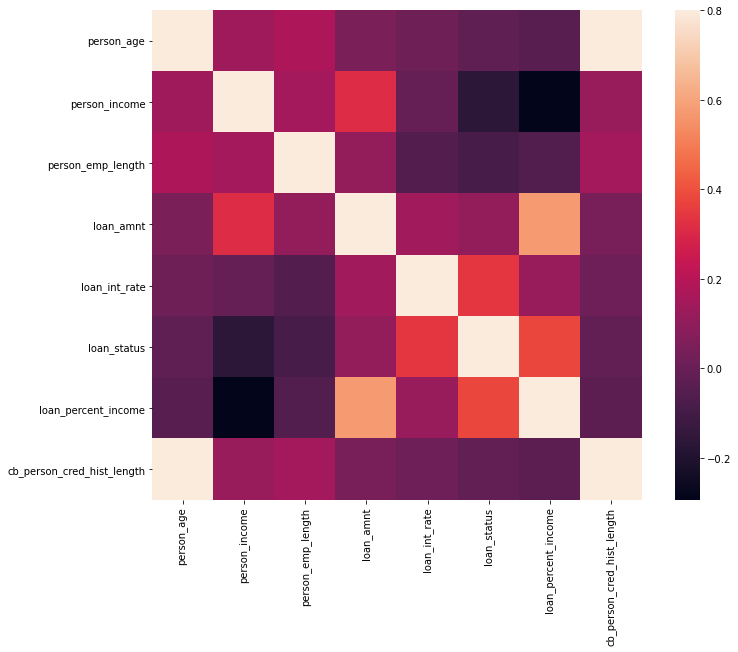

In [113]:
# Heatmap
corrmat = df_clean.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [114]:
# Correlation matrix
df_clean.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.141562,0.172554,0.052208,0.010370,-0.022130,-0.040311,0.878258
person_income,0.141562,1.000000,0.154746,0.314667,-0.003767,-0.164128,-0.293433,0.124272
person_emp_length,0.172554,0.154746,1.000000,0.110993,-0.058263,-0.085966,-0.058559,0.149404
loan_amnt,0.052208,0.314667,0.110993,1.000000,0.145895,0.112188,0.577004,0.042678
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330
loan_status,-0.022130,-0.164128,-0.085966,0.112188,0.339307,1.000000,0.379823,-0.016830
loan_percent_income,-0.040311,-0.293433,-0.058559,0.577004,0.123401,0.379823,1.000000,-0.030683
cb_person_cred_hist_length,0.878258,0.124272,0.149404,0.042678,0.015330,-0.016830,-0.030683,1.000000


In [116]:
# Creating dummy variables for nummeric variables
df_dum=pd.concat([pd.get_dummies(df_clean['person_home_ownership'], drop_first=False), pd.get_dummies(df_clean['loan_intent'], drop_first=False), pd.get_dummies(df_clean['loan_grade'], drop_first=True),pd.get_dummies(df_clean['cb_person_default_on_file'], drop_first=True)], axis=1)
df_merged = df_clean.merge(df_dum, left_index = True, right_index = True)
df_merged.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
24285,31,60000,RENT,4.0,HOMEIMPROVEMENT,A,4200,8.49,0,0.07,N,10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9577,21,25200,RENT,1.0,EDUCATION,A,8250,7.49,1,0.33,N,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9578,23,30000,RENT,5.0,MEDICAL,A,8250,7.51,0,0.28,N,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
22777,34,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,4000,5.42,0,0.07,N,8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9582,23,62500,MORTGAGE,7.0,VENTURE,A,4000,7.43,0,0.06,N,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [117]:
# Dropping OWN & Venture, as these two values have lowest likelihood for default in their variable
df_merged_final= df_merged.drop(['OWN', "VENTURE"], axis=1)
df_merged_final.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,B,C,D,E,F,G,Y
24285,31,60000,RENT,4.0,HOMEIMPROVEMENT,A,4200,8.49,0,0.07,N,10,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9577,21,25200,RENT,1.0,EDUCATION,A,8250,7.49,1,0.33,N,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9578,23,30000,RENT,5.0,MEDICAL,A,8250,7.51,0,0.28,N,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
22777,34,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,4000,5.42,0,0.07,N,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9582,23,62500,MORTGAGE,7.0,VENTURE,A,4000,7.43,0,0.06,N,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


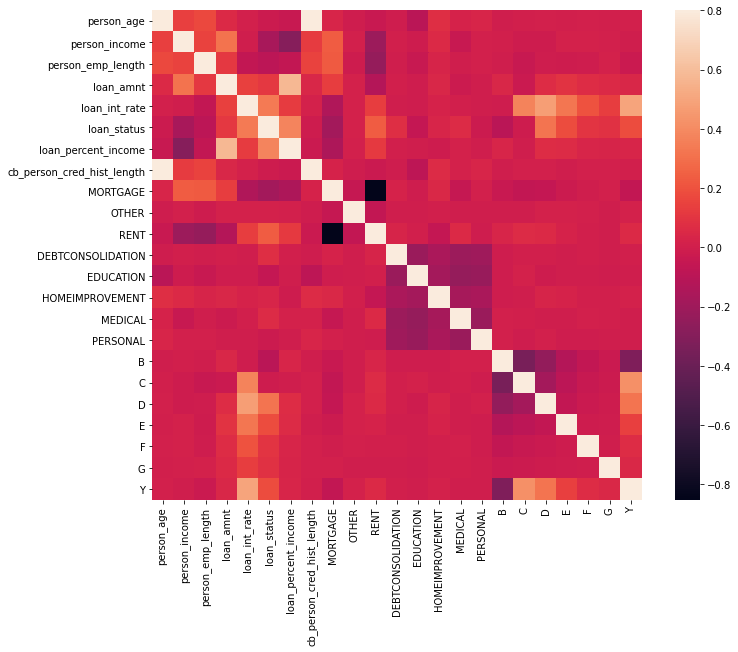

In [118]:
# Heatmap
corrmat_2 = df_merged_final.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat_2, vmax = .8, square = True)
plt.show()

In [119]:
# Correlation matrix
df_merged_final.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,B,C,D,E,F,G,Y
person_age,1.000000,0.141562,0.172554,0.052208,0.010370,-0.022130,-0.040311,0.878258,0.034094,-0.008685,-0.033102,-0.008777,-0.092365,0.076775,0.020130,0.034989,-0.006238,0.003431,0.008361,0.003017,0.008955,0.005118,0.006616
person_income,0.141562,1.000000,0.154746,0.314667,-0.003767,-0.164128,-0.293433,0.124272,0.235115,0.010920,-0.211717,0.004257,-0.017583,0.052324,-0.039830,0.008666,0.005712,-0.018920,-0.016344,0.015589,0.018769,0.008768,-0.003483
person_emp_length,0.172554,0.154746,1.000000,0.110993,-0.058263,-0.085966,-0.058559,0.149404,0.227228,-0.015868,-0.236502,-0.001887,-0.039182,0.030806,-0.001765,0.009253,-0.004636,-0.041209,-0.009772,-0.017666,-0.011333,0.014975,-0.030016
loan_amnt,0.052208,0.314667,0.110993,1.000000,0.145895,0.112188,0.577004,0.042678,0.130560,0.013001,-0.118122,0.000663,-0.010911,0.043983,-0.023304,-0.001162,0.044990,-0.029970,0.068687,0.091098,0.070248,0.053527,0.038768
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330,-0.133385,0.017611,0.132904,-0.002331,-0.008824,0.020436,0.005856,-0.002829,-0.007903,0.372474,0.477214,0.327038,0.200682,0.129622,0.500233
loan_status,-0.022130,-0.164128,-0.085966,0.112188,0.339307,1.000000,0.379823,-0.016830,-0.185576,0.013164,0.235343,0.072492,-0.055574,0.034441,0.058101,-0.022572,-0.094013,-0.015060,0.321853,0.182541,0.102823,0.084150,0.181090
loan_percent_income,-0.040311,-0.293433,-0.058559,0.577004,0.123401,0.379823,1.000000,-0.030683,-0.145305,0.012245,0.117368,0.003278,-0.001474,-0.016024,0.014110,-0.004504,0.034327,-0.000510,0.069808,0.059210,0.036348,0.031456,0.036227
cb_person_cred_hist_length,0.878258,0.124272,0.149404,0.042678,0.015330,-0.016830,-0.030683,1.000000,0.025036,-0.006913,-0.026450,-0.010139,-0.077459,0.058951,0.014605,0.036005,-0.002900,0.007075,0.007668,-0.000290,0.006694,0.007136,0.004003
MORTGAGE,0.034094,0.235115,0.227228,0.130560,-0.133385,-0.185576,-0.145305,0.025036,1.000000,-0.048852,-0.851564,0.025630,-0.006469,0.050782,-0.050182,0.009795,-0.034274,-0.062736,-0.056250,-0.020792,-0.001131,0.006503,-0.059630
OTHER,-0.008685,0.010920,-0.015868,0.013001,0.017611,0.013164,0.012245,-0.006913,-0.048852,1.000000,-0.059077,-0.000155,-0.005782,0.000250,-0.004079,-0.000185,-0.000459,-0.005914,0.013777,0.015247,0.007611,-0.002619,0.014221


In [122]:
# Cleaning to avoid multicollinearity
# To avoid multicollinearity, we remove person age from data frame as well as loan_amount

df_clean_final = df_merged_final.drop(['person_age', "loan_amnt"], axis=1)
df_clean_final.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,B,C,D,E,F,G,Y
24285,60000,RENT,4.0,HOMEIMPROVEMENT,A,8.49,0,0.07,N,10,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9577,25200,RENT,1.0,EDUCATION,A,7.49,1,0.33,N,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9578,30000,RENT,5.0,MEDICAL,A,7.51,0,0.28,N,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
22777,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,5.42,0,0.07,N,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9582,62500,MORTGAGE,7.0,VENTURE,A,7.43,0,0.06,N,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Logistic Regression


We will build two models of logistic regression:
1.) Through replacing rows with Null values
2.) Filling Null values with Mean

In [123]:
# Calculating Mean for rows with NULL values
ave_length = df_clean_final["person_emp_length"].sum()/(df_clean_final["person_emp_length"].size-df_clean_final["person_emp_length"].isnull().sum())
ave_ir = df_clean_final["loan_int_rate"].sum()/(df_clean_final["loan_int_rate"].size-df_clean_final["loan_int_rate"].isnull().sum())
# print(round(ave_length,2), round(ave_ir,2))
print(ave_length, ave_ir)

4.782063827772341 11.039701383067895


In [124]:
# Splitting up our data randomly in train & test dataset; save data as CSV
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df_clean_final, test_size=0.1)
#train.to_csv('train.csv', index=False)
#test.to_csv('test.csv', index=False)

1.) Through replacing rows with Null values

In [126]:
df_train = pd.read_csv("train.csv")
df_train.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,B,C,D,E,F,G,Y
0,65000,RENT,3.0,PERSONAL,B,12.42,0,0.15,N,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
1,60000,MORTGAGE,5.0,PERSONAL,D,15.21,0,0.25,Y,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,37000,RENT,2.0,VENTURE,B,11.11,0,0.12,N,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,138000,RENT,7.0,DEBTCONSOLIDATION,D,16.00,1,0.17,Y,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
4,35000,RENT,0.0,HOMEIMPROVEMENT,A,8.90,1,0.14,N,9,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [127]:
df_train_cleaned = df_train.dropna(how='any',axis=0) 
df_train_cleaned.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
MORTGAGE                      0
OTHER                         0
RENT                          0
DEBTCONSOLIDATION             0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
B                             0
C                             0
D                             0
E                             0
F                             0
G                             0
Y                             0
dtype: int64

In [128]:
df_test = pd.read_csv("test.csv")
df_test_cleaned = df_test.dropna(how='any',axis=0) 
df_test_cleaned.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
MORTGAGE                      0
OTHER                         0
RENT                          0
DEBTCONSOLIDATION             0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
B                             0
C                             0
D                             0
E                             0
F                             0
G                             0
Y                             0
dtype: int64

In [130]:
y = df_train_cleaned['loan_status']
x = df_train_cleaned[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length","MORTGAGE", "OTHER", "RENT","DEBTCONSOLIDATION", "EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL","B", "C", "D", "E", "F", "G", "Y"]]
x = sm.add_constant(x)
model = sm.Logit(y, x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.342386
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25789
Model:                          Logit   Df Residuals:                    25768
Method:                           MLE   Df Model:                           20
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:                  0.3449
Time:                        22:24:18   Log-Likelihood:                -8829.8
converged:                       True   LL-Null:                       -13478.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -6.2786      0.203    -30.903      0.000      -6.677      -5.880
person_income              -1.171e-05   7.54e-07    -15.524      0.000   -1.32e-05   -1.02e-05
person_emp_length             -0.0213      0.005     -4.011      0.000      -0.032      -0.011
loan_int_rate                  0.0730      0.019      3.863      0.000       0.036       0.110
loan_percent_income            8.5314      0.192     44.445      0.000       8.155       8.908
cb_person_cred_hist_length    -0.0060      0.005     -1.239      0.215      -0.016       0.004
MORTGAGE                       1.5913      0.114     13.920      0.000       1.367       1.815
OTHER                          2.0577      0.341      6.027      0.000       1.389       2.727
RENT                           2.4726      0.111     22.293      0.000       2.255       2.690
DEBTCONSOLIDATION              1.0798      0.069     15.710      0.000       0.945       1.215
EDUCATION                      0.1860      0.070      2.667      0.008       0.049       0.323
HOMEIMPROVEMENT                1.1223      0.077     14.552      0.000       0.971       1.273
MEDICAL                        0.9064      0.067     13.452      0.000       0.774       1.038
PERSONAL                       0.4408      0.071      6.197      0.000       0.301       0.580
B                              0.1034      0.086      1.203      0.229      -0.065       0.272
C                              0.3116      0.129      2.411      0.016       0.058       0.565
D                              2.3220      0.163     14.222      0.000       2.002       2.642
E                              2.4940      0.207     12.043      0.000       2.088       2.900
F                              2.6011      0.287      9.060      0.000       2.038       3.164
G                              6.4712      1.157      5.595      0.000       4.204       8.738
Y                             -0.0122      0.056     -0.220      0.826      -0.121       0.097
==============================================================================================
"""

In [132]:
# Checking predictions for train data:
predict_log = pd.DataFrame(results.predict(x), columns=['prob_default'])
pred_df = pd.concat([y, predict_log],axis=1)
pred_df.head()

,loan_status,prob_default
0,0,0.128749
1,0,0.617697
2,0,0.084749
3,1,0.604815
4,1,0.213578


In [133]:
# Prediction table for train data:
results.pred_table()

array([[19301.,   901.],
       [ 2519.,  3068.]])

In [ ]:
# Now trying to predict the test data

In [136]:
y_new = df_test_cleaned['loan_status']
x_new = df_test_cleaned[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length","MORTGAGE", "OTHER", "RENT","DEBTCONSOLIDATION", "EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL","B", "C", "D", "E", "F", "G", "Y"]]
x_new = sm.add_constant(x_new)
predict_log2 = pd.DataFrame(results.predict(x_new), columns=['prob_default'])
pred_df2 = pd.concat([y_new, predict_log2],axis=1)
pred_df2.head(5)

,loan_status,prob_default
0,0,0.008247
1,0,0.235785
2,0,0.300638
3,0,0.164889
4,0,0.004001


In [140]:
# Creating Crosstable to analyse our prediction
pred_df2['Predicted loan_status'] = np.where(pred_df2["prob_default"] > 0.5, '1', '0')
predcition_tab = pd.crosstab(pred_df2['loan_status'], pred_df2['Predicted loan_status'])
predcition_tab

Predicted loan_status,0,1
loan_status,,
0,2131,97
1,279,336


2.) Filling Null values with Mean

In [141]:
train_new = pd.read_csv("train.csv")
test_new = pd.read_csv("test.csv")

In [142]:
train_new["person_emp_length"].fillna(ave_length, inplace=True)
train_new["loan_int_rate"].fillna(ave_ir, inplace=True)
test_new["person_emp_length"].fillna(ave_length, inplace=True)
test_new["loan_int_rate"].fillna(ave_ir, inplace=True)

In [145]:
y_2 = train_new['loan_status']
x_2 = train_new[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length","MORTGAGE", "OTHER", "RENT","DEBTCONSOLIDATION", "EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL","B", "C", "D", "E", "F", "G", "Y"]]
x_2 = sm.add_constant(x_2)
model = sm.Logit(y_2, x_2)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.342645
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                28511
Model:                          Logit   Df Residuals:                    28490
Method:                           MLE   Df Model:                           20
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:                  0.3422
Time:                        23:09:42   Log-Likelihood:                -9769.2
converged:                       True   LL-Null:                       -14851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -6.0909      0.174    -35.094      0.000      -6.431      -5.751
person_income              -1.164e-05   7.21e-07    -16.152      0.000   -1.31e-05   -1.02e-05
person_emp_length             -0.0218      0.005     -4.312      0.000      -0.032      -0.012
loan_int_rate                  0.0554      0.014      4.035      0.000       0.029       0.082
loan_percent_income            8.5689      0.183     46.868      0.000       8.211       8.927
cb_person_cred_hist_length    -0.0054      0.005     -1.165      0.244      -0.014       0.004
MORTGAGE                       1.5180      0.107     14.177      0.000       1.308       1.728
OTHER                          2.0513      0.316      6.489      0.000       1.432       2.671
RENT                           2.4042      0.104     23.192      0.000       2.201       2.607
DEBTCONSOLIDATION              1.0624      0.065     16.323      0.000       0.935       1.190
EDUCATION                      0.1717      0.066      2.593      0.010       0.042       0.301
HOMEIMPROVEMENT                1.0619      0.073     14.500      0.000       0.918       1.205
MEDICAL                        0.8803      0.064     13.812      0.000       0.755       1.005
PERSONAL                       0.4098      0.068      6.071      0.000       0.278       0.542
B                              0.1832      0.067      2.714      0.007       0.051       0.315
C                              0.4607      0.096      4.817      0.000       0.273       0.648
D                              2.4642      0.118     20.910      0.000       2.233       2.695
E                              2.6773      0.154     17.350      0.000       2.375       2.980
F                              2.8748      0.226     12.694      0.000       2.431       3.319
G                              6.8644      1.121      6.124      0.000       4.667       9.061
Y                             -0.0150      0.053     -0.283      0.777      -0.119       0.089
==============================================================================================
"""

In [146]:
# Checking predictions for train data:
y_2new = test_new['loan_status']
x_2new = test_new[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length","MORTGAGE", "OTHER", "RENT","DEBTCONSOLIDATION", "EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL","B", "C", "D", "E", "F", "G", "Y"]]
x_2new = sm.add_constant(x_2new)
predict_log2new = pd.DataFrame(results.predict(x_2new), columns=['prob_default'])
pred_df2new = pd.concat([y_2new, predict_log2new],axis=1)
pred_df2new.head(5)

,loan_status,prob_default
0,0,0.008378
1,0,0.236982
2,0,0.291963
3,0,0.167878
4,0,0.004299


In [147]:
# Creating Crosstable to analyse our prediction
pred_df2new['Predicted loan_status'] = np.where(pred_df2new["prob_default"] > 0.5, '1', '0')
predcition_tab_new = pd.crosstab(pred_df2new['loan_status'], pred_df2new['Predicted loan_status'])
predcition_tab_new

Predicted loan_status,0,1
loan_status,,
0,2375,106
1,320,367


In [ ]:
# no difference between two models therefore we stick to the first one

### Interpretation of Regression/Prediction

In [ ]:
# Regression

In [ ]:
# Prediction

# number of customers per loan_status
default=predcition_tab.iloc[0]
non_default=predcition_tab.iloc[1]
# number of customers who defaulted and we predicted default
default_true=predcition_tab.iloc[1,1]
# number of customers who did not defaulted and we predicted default
non_default_false=predcition_tab.iloc[0,1]
# number of customers who defaulted and we predicted no default
default_false=predcition_tab.iloc[1,0]
# number of customers who did not defaulted and we predicted no default
non_default_true=predcition_tab.iloc[1,1]

true_prediction=
false_prediction=
true_negative=
true_positive


#heatmap